In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("C:/msys64/home/for/10th/standard/LinearBNB/2025_Airbnb_NYC_listings.csv")
df.T

,0,1,2,3,4,5,6,7,8,9,...,22298,22299,22300,22301,22302,22303,22304,22305,22306,22307
Unnamed: 0,0,1,2,3,4,5,7,8,9,11,...,37424,37425,37426,37427,37428,37429,37430,37431,37432,37433
id,36121,36647,38663,38833,39282,39572,6848,6872,6990,7097,...,1366237322410703508,1366259830382103771,1366263359400557457,1366276159114868718,1366302485518054103,1366333532374850165,1366717321390111215,1366721904709517353,1366722692755341871,1366723228243064949
source,city scrape,city scrape,city scrape,city scrape,city scrape,city scrape,city scrape,city scrape,city scrape,city scrape,...,city scrape,city scrape,city scrape,city scrape,city scrape,city scrape,city scrape,city scrape,city scrape,city scrape
name,Lg Rm in Historic Prospect Heights,"1 Bedroom & your own Bathroom, Elevator Apartment",Luxury Brownstone in Boerum Hill,Spectacular West Harlem Garden Apt,“Work-from-home” from OUR home.,1 br in a 2 br apt (Midtown West),Only 2 stops to Manhattan studio,Uptown Sanctuary w/ Private Bath (Month to Month),UES Beautiful Blue Room,"Perfect for Your Parents, With Garden & Patio",...,New York City 5-Bed Suite,New York City 5-Bed Suite,New York City 5-Bed Suite,Fort Greene Penthouse,Time Square Private Room,Beautiful 1-Bed Apt in Harlem!,Private Room w/ Ensuite Bath H,2 Bedroom on East Side,Stylish 2Bd near Bryant Park,Modern Private Room + Bath H
description,Cozy space share in the heart of a great neigh...,Private bedroom with your own bathroom in a 2 ...,"Beautiful, large home in great hipster neighbo...",This is a very large and unique space. An inc...,*Monthly Discount will automatically apply <br...,NaN,Comfortable studio apartment with super comfor...,This charming distancing-friendly month-to-mon...,Beautiful peaceful healthy home,Parents/grandparents coming to town or are you...,...,This stylish place is close to must-see destin...,This stylish place is close to must-see destin...,You'll enjoy your time at this cheerful getaway.,"This large, sunny top floor unit with three ex...",The whole group will enjoy easy access to ever...,Welcome to your temporary home in the vibrant ...,Stylish Private Rooms w/ En-Suite Baths in Bro...,Located in the Murray Hill area and occupies a...,Enjoy everything the city has to offer while l...,Stylish Private Rooms w/ En-Suite Baths in Bro...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
calculated_host_listings_count,1,1,1,1,2,2,1,2,1,2,...,4,4,4,1,4,1,24,48,25,24
calculated_host_listings_count_entire_homes,0,0,0,1,0,1,1,0,0,0,...,0,0,0,1,1,0,0,48,25,0
calculated_host_listings_count_private_rooms,1,1,1,0,2,1,0,2,1,2,...,4,4,4,0,3,1,24,0,0,24
calculated_host_listings_count_shared_rooms,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

df.isnull().sum()

Unnamed: 0                                         0
id                                                 0
source                                             0
name                                               0
description                                      405
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               6798
Length: 73, dtype: int64

In [3]:
# df1 = df['review_scores_rating'].dropna()
# #df1.count() : 15510 (22309 - 6798)
# # df1 = 리뷰가 없는 데이터는 제외


# df1 = df1.reset_index()
# df.corr(method = 'pearson')

# plt.figure(figsize = (30, 20))
# ax = sns.heatmap(df.corr(method = 'spearman'), annot=True, fmt=".2f")
# plt.tight_layout()
# plt.show()

C:\Users\for\AppData\Local\Temp\ipykernel_7148\3516657411.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location["host_since"] = pd.to_datetime(location["host_since"])
C:\Users\for\AppData\Local\Temp\ipykernel_7148\3516657411.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location["month"] = location["host_since"].dt.strftime("%Y-%m")
C:\Users\for\AppData\Local\Temp\ipykernel_7148\3516657411.py:17: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future versi

<Axes: >

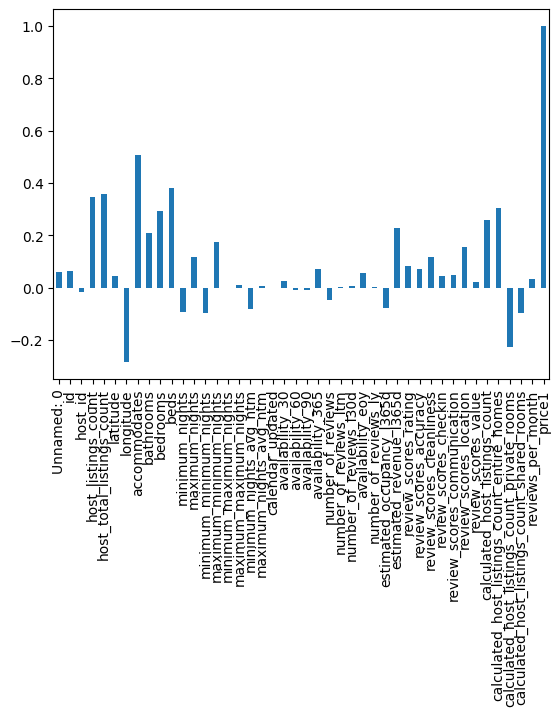

In [4]:
location = df[['host_id', 'host_name', 'host_since', 'host_location', 'host_response_time', 'host_response_rate', 
             'host_acceptance_rate', 'host_is_superhost', 'host_listings_count', 'host_identity_verified'
             , 'calculated_host_listings_count']]
location["host_since"] = pd.to_datetime(location["host_since"])
location["month"] = location["host_since"].dt.strftime("%Y-%m")



df['price1'] = df['price'].str.split('$').str[1].str.strip().str.replace(',', '').astype('float')
df['price1'] = np.log(df['price1'])

# plt.figure(figsize = (20, 10))
# ax = sns.heatmap(location.corr(method = 'pearson'), anot = True, fmt = ".2f")
# plt.tight_layout()
# plt.show()

df.corr()['price1'].plot(kind = 'bar')

C:\Users\for\AppData\Local\Temp\ipykernel_7148\1672528224.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price1'].hist(bins = 50)
C:\Users\for\AppData\Local\Temp\ipykernel_7148\1672528224.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price1'].median() #threshold = 50%, 0.031 이상의 값들은 50%가 넘는다.


0.04687751285414118

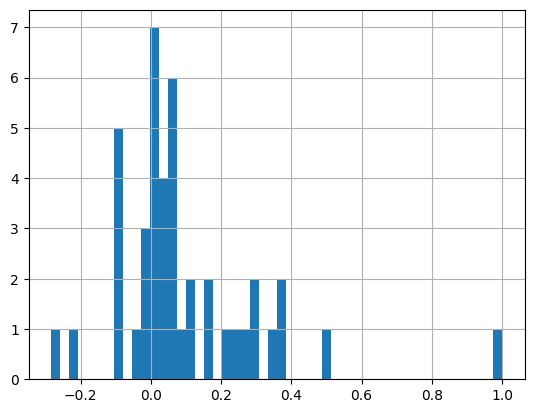

In [ ]:
df.corr()['price1'].hist(bins = 50)
df.corr()['price1'].median() #threshold = 50%, 0.047 이상의 값들은 50%가 넘는다. 

In [33]:
# df.corr()['price1'].abs() > df.corr()['price1'].abs().quantile(0.75) #상위 25%, 0.23
df.corr(method = 'pearson')['price1']
# print(df.corr()['price1'])

C:\Users\for\AppData\Local\Temp\ipykernel_7148\3367662529.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method = 'pearson')['price1']


Unnamed: 0                                      0.059416
id                                              0.062551
host_id                                        -0.015650
host_listings_count                             0.348166
host_total_listings_count                       0.359208
latitude                                        0.046800
longitude                                      -0.283846
accommodates                                    0.506397
bathrooms                                       0.196351
bedrooms                                        0.293367
beds                                            0.380691
minimum_nights                                 -0.092005
maximum_nights                                  0.118764
minimum_minimum_nights                         -0.094877
maximum_minimum_nights                          0.174971
minimum_maximum_nights                          0.001028
maximum_maximum_nights                          0.010150
minimum_nights_avg_ntm         

In [46]:
df.corr(method = 'spearman')['price1'].abs() > df.corr(method = 'spearman')['price1'].abs().quantile(0.75) #0.10675000669850952

C:\Users\for\AppData\Local\Temp\ipykernel_7148\2948961699.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method = 'spearman')['price1'].abs() > df.corr(method = 'spearman')['price1'].abs().quantile(0.75) #0.10675000669850952


Unnamed: 0                                      False
id                                              False
host_id                                         False
host_listings_count                             False
host_total_listings_count                       False
latitude                                        False
longitude                                        True
accommodates                                     True
bathrooms                                        True
bedrooms                                         True
beds                                             True
minimum_nights                                  False
maximum_nights                                  False
minimum_minimum_nights                          False
maximum_minimum_nights                          False
minimum_maximum_nights                          False
maximum_maximum_nights                          False
minimum_nights_avg_ntm                          False
maximum_nights_avg_ntm      

In [7]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
from statsmodels.stats.multitest import multipletests

# 1) log 컬럼 만들기 (없으면)
df["price1_log"] = np.log1p(df["price1"])

target = "price1_log"   # <- 문자열!
cols = [
    "accommodates",
    "host_listings_count",
    "host_total_listings_count",
    "bathrooms",
    "bedrooms",
    "beds",
    "estimated_revenue_l365d",
    "calculated_host_listings_count",
    "calculated_host_listings_count_entire_homes",
]

rows = []
for c in cols:
    tmp = df[[target, c]].dropna()
    if len(tmp) < 3 or tmp[c].nunique() < 2:
        continue
    r, p = pearsonr(tmp[target], tmp[c])
    rows.append({"col": c, "n": len(tmp), "r": r, "p_value": p})

res = pd.DataFrame(rows).sort_values("p_value").reset_index(drop=True)
if not res.empty:
    res["p_adj_fdr_bh"] = multipletests(res["p_value"], method="fdr_bh")[1]

res


,col,n,r,p_value,p_adj_fdr_bh
0,accommodates,22308,0.498667,0.000000e+00,0.000000e+00
1,host_listings_count,22288,0.338597,0.000000e+00,0.000000e+00
2,host_total_listings_count,22288,0.346864,0.000000e+00,0.000000e+00
3,bedrooms,22259,0.280300,0.000000e+00,0.000000e+00
4,beds,22229,0.376949,0.000000e+00,0.000000e+00
5,calculated_host_listings_count_entire_homes,22308,0.302249,0.000000e+00,0.000000e+00
6,calculated_host_listings_count,22308,0.253060,5.928788e-323,7.410985e-323
7,estimated_revenue_l365d,22308,0.232529,1.308730e-271,1.472321e-271
8,bathrooms,22302,0.183059,2.579772e-167,2.579772e-167


In [8]:
# df['accommodates'].info
# <bound method Series.info of 0        1
# 1        2
# 2        2
# 3        2
# 4        2
#         ..
# 22303    1
# 22304    2
# 22305    5
# 22306    4
# 22307    2
# Name: accommodates, Length: 22308, dtype: int64>

In [9]:
df['bathrooms'].isnull().sum()

6

In [10]:
df['bathrooms'] = df['bathrooms'].round()
df.corr()['bathrooms']

C:\Users\for\AppData\Local\Temp\ipykernel_7148\151953170.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['bathrooms']


Unnamed: 0                                      0.025047
id                                              0.028861
host_id                                        -0.009455
host_listings_count                            -0.009652
host_total_listings_count                       0.004902
latitude                                       -0.039681
longitude                                       0.006456
accommodates                                    0.379251
bathrooms                                       1.000000
bedrooms                                        0.421827
beds                                            0.383431
minimum_nights                                  0.059921
maximum_nights                                  0.020849
minimum_minimum_nights                          0.059101
maximum_minimum_nights                          0.037896
minimum_maximum_nights                         -0.002431
maximum_maximum_nights                         -0.007572
minimum_nights_avg_ntm         

In [11]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
from statsmodels.stats.multitest import multipletests

# 1) log 컬럼 만들기 (없으면)
df["price1_log"] = np.log1p(df["price1"])

target = "price1_log"   # <- 문자열!
cols = [
    "accommodates",
    "host_listings_count",
    "host_total_listings_count",
    "bathrooms",
    "bedrooms",
    "beds",
    "estimated_revenue_l365d",
    "calculated_host_listings_count",
    "calculated_host_listings_count_entire_homes",
]

rows = []
for c in cols:
    tmp = df[[target, c]].dropna()
    if len(tmp) < 3 or tmp[c].nunique() < 2:
        continue
    r, p = pearsonr(tmp[target], tmp[c])
    rows.append({"col": c, "n": len(tmp), "r": r, "p_value": p})

res = pd.DataFrame(rows).sort_values("p_value").reset_index(drop=True)
if not res.empty:
    res["p_adj_fdr_bh"] = multipletests(res["p_value"], method="fdr_bh")[1]

res


#bathrooms의 r은 높으나, p-value가 낮으므로 bathrooms의 데이터가 어떻게 되었는지 살펴본 뒤, 1.5, 2.5같은 식으로도 저장되어있는 것을 확인,
#데이터 자체가 결측치가 많거나 .5의 형태로 나와있으면 p-value의 값이 커질 수 있으므로 이를 처리하고
#다시 p-value를 확인했으나 1.11정도로 1.4가까이 줄긴했지만 p-value가 낮은 다른 컬럼들보다는 크기 때문에 bathrooms는 소거한다.


,col,n,r,p_value,p_adj_fdr_bh
0,accommodates,22308,0.498667,0.000000e+00,0.000000e+00
1,host_listings_count,22288,0.338597,0.000000e+00,0.000000e+00
2,host_total_listings_count,22288,0.346864,0.000000e+00,0.000000e+00
3,bedrooms,22259,0.280300,0.000000e+00,0.000000e+00
4,beds,22229,0.376949,0.000000e+00,0.000000e+00
5,calculated_host_listings_count_entire_homes,22308,0.302249,0.000000e+00,0.000000e+00
6,calculated_host_listings_count,22308,0.253060,5.928788e-323,7.410985e-323
7,estimated_revenue_l365d,22308,0.232529,1.308730e-271,1.472321e-271
8,bathrooms,22302,0.169672,1.113675e-143,1.113675e-143


In [12]:
import statsmodels.api as sm

X = df[["bathrooms"]]
y = df["price1"]

data = pd.concat([X, y], axis=1).dropna()
X2 = sm.add_constant(data[["bathrooms"]])

model = sm.OLS(data["price1"], X2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 price1   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     894.2
Date:                Wed, 24 Dec 2025   Prob (F-statistic):          1.12e-192
Time:                        10:23:54   Log-Likelihood:                -25663.
No. Observations:               22302   AIC:                         5.133e+04
Df Residuals:                   22300   BIC:                         5.135e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6649      0.012    391.750      0.0

In [13]:
X = df[["accommodates"]]
y = df["price1"]

data = pd.concat([X, y], axis=1).dropna()
X2 = sm.add_constant(data[["accommodates"]])

model = sm.OLS(data["price1"], X2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 price1   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     7693.
Date:                Wed, 24 Dec 2025   Prob (F-statistic):               0.00
Time:                        10:23:54   Log-Likelihood:                -22802.
No. Observations:               22308   AIC:                         4.561e+04
Df Residuals:                   22306   BIC:                         4.562e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.4303      0.008    569.705   

In [14]:
X = df[["host_listings_count"]]
y = df["price1"]

data = pd.concat([X, y], axis=1).dropna()
X2 = sm.add_constant(data[["host_listings_count"]])

model = sm.OLS(data["price1"], X2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 price1   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     3074.
Date:                Wed, 24 Dec 2025   Prob (F-statistic):               0.00
Time:                        10:23:54   Log-Likelihood:                -24646.
No. Observations:               22288   AIC:                         4.930e+04
Df Residuals:                   22286   BIC:                         4.931e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   4.9015    

In [15]:
X = df[["host_total_listings_count"]]
y = df["price1"]

data = pd.concat([X, y], axis=1).dropna()
X2 = sm.add_constant(data[["host_total_listings_count"]])

model = sm.OLS(data["price1"], X2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 price1   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     3302.
Date:                Wed, 24 Dec 2025   Prob (F-statistic):               0.00
Time:                        10:23:54   Log-Likelihood:                -24547.
No. Observations:               22288   AIC:                         4.910e+04
Df Residuals:                   22286   BIC:                         4.911e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [16]:
X = df[["bedrooms"]]
y = df["price1"]

data = pd.concat([X, y], axis=1).dropna()
X2 = sm.add_constant(data[["bedrooms"]])

model = sm.OLS(data["price1"], X2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 price1   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     2096.
Date:                Wed, 24 Dec 2025   Prob (F-statistic):               0.00
Time:                        10:23:54   Log-Likelihood:                -25034.
No. Observations:               22259   AIC:                         5.007e+04
Df Residuals:                   22257   BIC:                         5.009e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6599      0.009    534.125      0.0

In [17]:
X = df[["beds"]]
y = df["price1"]

data = pd.concat([X, y], axis=1).dropna()
X2 = sm.add_constant(data[["beds"]])

model = sm.OLS(data["price1"], X2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 price1   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     3767.
Date:                Wed, 24 Dec 2025   Prob (F-statistic):               0.00
Time:                        10:23:54   Log-Likelihood:                -24280.
No. Observations:               22229   AIC:                         4.856e+04
Df Residuals:                   22227   BIC:                         4.858e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5784      0.008    557.591      0.0

In [18]:
X = df[["calculated_host_listings_count_entire_homes"]]
y = df["price1"]

data = pd.concat([X, y], axis=1).dropna()
X2 = sm.add_constant(data[["calculated_host_listings_count_entire_homes"]])

model = sm.OLS(data["price1"], X2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 price1   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     2289.
Date:                Wed, 24 Dec 2025   Prob (F-statistic):               0.00
Time:                        10:23:54   Log-Likelihood:                -25017.
No. Observations:               22308   AIC:                         5.004e+04
Df Residuals:                   22306   BIC:                         5.005e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [19]:
X = df[["calculated_host_listings_count"]]
y = df["price1"]

data = pd.concat([X, y], axis=1).dropna()
X2 = sm.add_constant(data[["calculated_host_listings_count"]])

model = sm.OLS(data["price1"], X2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 price1   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     1626.
Date:                Wed, 24 Dec 2025   Prob (F-statistic):               0.00
Time:                        10:23:54   Log-Likelihood:                -25322.
No. Observations:               22308   AIC:                         5.065e+04
Df Residuals:                   22306   BIC:                         5.066e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [20]:
X = df[["estimated_revenue_l365d"]]
y = df["price1"]

data = pd.concat([X, y], axis=1).dropna()
X2 = sm.add_constant(data[["estimated_revenue_l365d"]])

model = sm.OLS(data["price1"], X2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 price1   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     1247.
Date:                Wed, 24 Dec 2025   Prob (F-statistic):          9.24e-266
Time:                        10:23:54   Log-Likelihood:                -25500.
No. Observations:               22308   AIC:                         5.100e+04
Df Residuals:                   22306   BIC:                         5.102e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [21]:
X = df[["bathrooms"]]
y = df["price1"]

data = pd.concat([X, y], axis=1).dropna()
X2 = sm.add_constant(data[["bathrooms"]])

model = sm.OLS(data["price1"], X2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 price1   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     894.2
Date:                Wed, 24 Dec 2025   Prob (F-statistic):          1.12e-192
Time:                        10:23:54   Log-Likelihood:                -25663.
No. Observations:               22302   AIC:                         5.133e+04
Df Residuals:                   22300   BIC:                         5.135e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6649      0.012    391.750      0.0

In [22]:
df['number_of_reviews_ltm']

0         0
1         0
2         0
3        42
4        12
         ..
22303     0
22304     0
22305     0
22306     0
22307     0
Name: number_of_reviews_ltm, Length: 22308, dtype: int64

In [51]:
df.corr(method = 'spearman')['number_of_reviews_ltm'].abs().quantile(0.75)

C:\Users\for\AppData\Local\Temp\ipykernel_7148\3284927103.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method = 'spearman')['number_of_reviews_ltm'].abs().quantile(0.75)


0.33945949164244676

In [40]:
df.corr(method='spearman')['number_of_reviews_ltm'] > df.corr(method='spearman')['number_of_reviews_ltm'].abs().quantile(0.75)

C:\Users\for\AppData\Local\Temp\ipykernel_7148\956982059.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='spearman')['number_of_reviews_ltm'] > df.corr(method='spearman')['number_of_reviews_ltm'].abs().quantile(0.75)


Unnamed: 0                                      False
id                                              False
host_id                                         False
host_listings_count                             False
host_total_listings_count                       False
latitude                                        False
longitude                                       False
accommodates                                    False
bathrooms                                       False
bedrooms                                        False
beds                                            False
minimum_nights                                  False
maximum_nights                                  False
minimum_minimum_nights                          False
maximum_minimum_nights                          False
minimum_maximum_nights                          False
maximum_maximum_nights                          False
minimum_nights_avg_ntm                          False
maximum_nights_avg_ntm      

In [42]:
df.corr(method = 'spearman')['number_of_reviews_ltm']

C:\Users\for\AppData\Local\Temp\ipykernel_7148\2364480710.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method = 'spearman')['number_of_reviews_ltm']


Unnamed: 0                                     -0.137800
id                                             -0.137955
host_id                                        -0.015494
host_listings_count                            -0.147239
host_total_listings_count                      -0.168235
latitude                                       -0.053983
longitude                                       0.012738
accommodates                                    0.037488
bathrooms                                      -0.043707
bedrooms                                       -0.062693
beds                                            0.075409
minimum_nights                                 -0.528948
maximum_nights                                 -0.186773
minimum_minimum_nights                         -0.536832
maximum_minimum_nights                         -0.517519
minimum_maximum_nights                         -0.072961
maximum_maximum_nights                         -0.053315
minimum_nights_avg_ntm         

<Axes: >

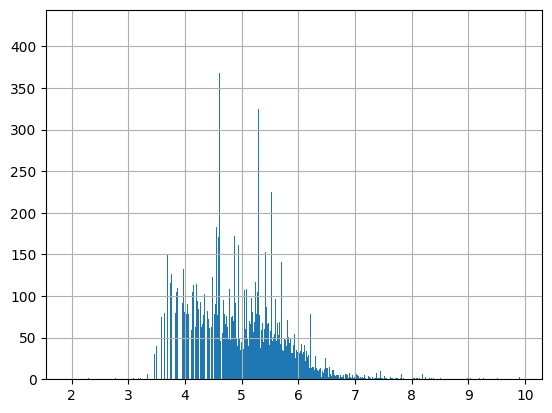

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

df['price1'].hist(bins = 1000) #y축은 count, x축은 로그화된 price

In [ ]:
df['price1'].quantile(0.75) #상위 25% 숙소 가격 그룹 > 원핫 + 라벨 인코딩을 섞어서 쓰기 위해, 범주를 나눈다.

5.480638923341991